<a href="https://colab.research.google.com/github/alsgud2659/ai/blob/main/MachineLearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝이란 !!!
# 정답이 있는 입력데이터를 모델에 투입하여 입력 데이터와 정답 사이의 
# 관계를 학습한다. 따라서 새로운 데이터를 입력했을 때 모델이 학습한
# 결과를 적용하여 예측할 수 있다. (지도학습)
# 정답이 없는 경우 데이터 속에 숨어 있는 패턴이나 규칙을 알아낼수도 
# 있다.(비지도학습) 

# 이처럼 사람이 어떤 규칙을 정하는 것이 아니라 컴퓨터가 스스로 데이터를
# 학습하여 문제를 해결하는 과정을 머신러닝이라한다. 

# 지도학습 supervised learning      문제와 답을 모두 투입
# 비지도학습 unsupervised learning  문제만 투입

# 회귀regression와 분류classification

# 회귀 문제 : 설명 변수와 목표 변수 사이의 연속적인 회귀 관계식을 찾는다. 
#             금값의 변화, 주가의 변화, 코인의 변화, 날씨의 변화, 중고차 가격 변환..

# 분류 문제 : 설명 변수와 목표 변수 사이의 관계를 찾지만 연속적이지 않은 이산적인 값을
              # 찾는다. 
              # 개와 고양이를 분류, 0~9 중 숫자를 판독,


In [ ]:
# 머신러닝 프로세스

# 문제파악  ->  데이터 탐색   ->  데이터 전처리 ->  모델학습  ->  예측

In [1]:
# 붓꽃의 품종 판별

import pandas as pd   # 데이터 분석 모듈
import numpy as np    # 데이터 계산 모듈

from sklearn import datasets # 머신러닝 관련 모듈
iris = datasets.load_iris()  # 내장 데이터셋 읽어오기



In [3]:
# iris 데이터셋 확인 (기본적으로 딕셔너리로 구성되어있다.)
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [2]:
print(iris['DESCR'])
        # 설명 변수 feature
        # - sepal length in cm 꽃받침 길이
        # - sepal width in cm  꽃받침 너비
        # - petal length in cm 꽃잎의 길이
        # - petal width in cm  꽃잎의 너비

        # 목표 변수 class
        # - Iris-Setosa        0
        # - Iris-Versicolour   1
        # - Iris-Virginica     2

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
iris['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
# 데이터 프레임으로 변환 (pandas의 자료형)

df = pd.DataFrame(iris['data'], columns = iris['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
# 열 이름 변환
df.columns = ['sepal_length',	'sepal_width'	,'petal_length',	'petal_width']
df

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
df['target'] = iris['target']
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [9]:
# 데이터 프레임 확인하기
df.info() # 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [10]:
df.describe() # 통계 정보

,sepal_length,sepal_width,petal_length,petal_width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [11]:
df.isnull().sum() #결측치 확인 <- 없음

# 결측치를 발견할 경우 일반적으로는 평균값이나 최빈값으로 결측치를 대체한다.
# 결측치는 자료를 수집하거나 정리하는 과정에서 누락되어 유효한 데이터가 없는 경우이다.
# 대부분의 머신러닝 알고리즘은 결측값이 있으면 오류가 발생된다. 따라서 결측치를
# 유효한 값으로 대체하거나 결측값을 삭제하는 처리가 반드시 필요하다.

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64

In [12]:
# 상관 관계 분석
df.corr()

,sepal_length,sepal_width,petal_length,petal_width,target
sepal_length,1.000000,-0.117570,0.871754,0.817941,0.782561
sepal_width,-0.117570,1.000000,-0.428440,-0.366126,-0.426658
petal_length,0.871754,-0.428440,1.000000,0.962865,0.949035
petal_width,0.817941,-0.366126,0.962865,1.000000,0.956547
target,0.782561,-0.426658,0.949035,0.956547,1.000000


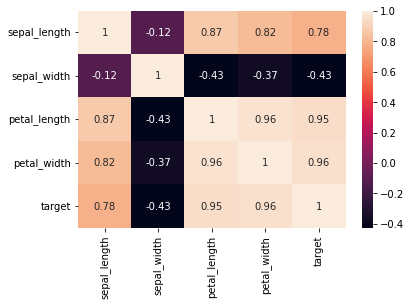

In [13]:
# 상관관계 시각화
import seaborn as sns # 시각화 관련 모듈

sns.heatmap(data = df.corr(), annot = True)

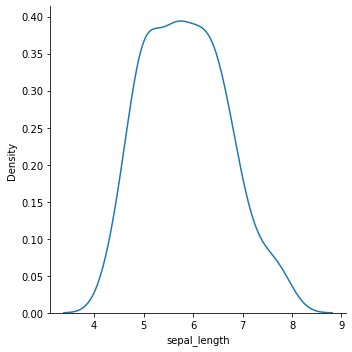

In [14]:
# 정규분포 확인
sns.displot(x = 'sepal_length', data = df, kind = 'kde')

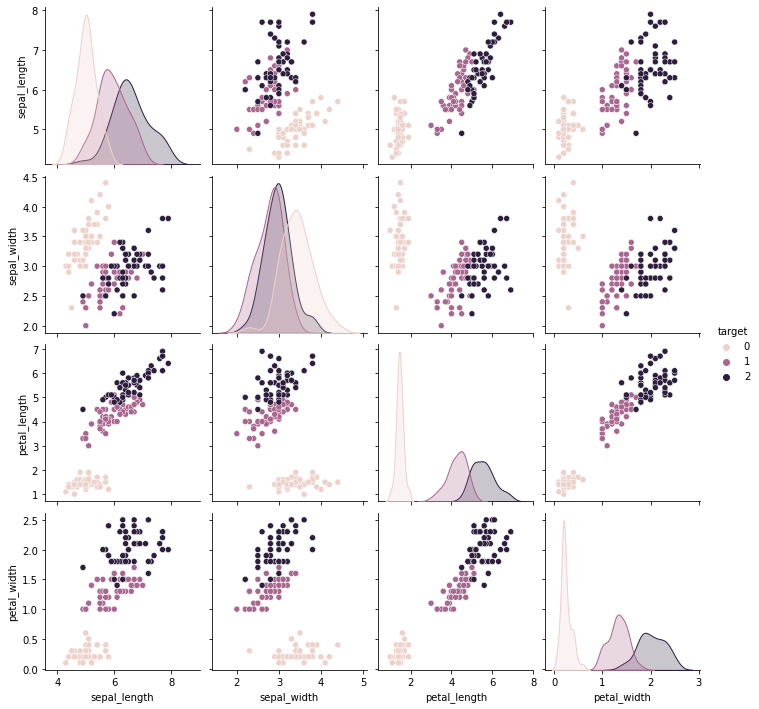

In [15]:
sns.pairplot(df, hue = 'target', diag_kind = 'kde')

In [16]:
# 훈련용 train과 검증용 test 데이터 셋 분할
# 모델 학습에 사용할 훈련용 데이터와 모델성능 평가로 사용할 검증용 test데이터로 분리하자.
# 일반적으로 8:2로 분할 비율을 사용한다.

# df을 문제지와 답안지 형태로 다시 분할한다.
# 문제지
X_data = df.loc[:, 'sepal_length':'petal_width'] 

# 답안지
y_data = df.loc[:,'target']
X_data

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2,shuffle = True, random_state = 20)

In [18]:
X_test.shape

(30, 4)

In [20]:
# KNN Algorithm (K-Nearest_Neighbors)
# 예측 하려는 데이터 X 가 주어지면 기존 데이터 중 속성이 비슷한 K개의 이웃을 찾는다.
# 다시 말해 X 를 둘러싼 주변의 K개의 가장 가까운 이웃을 찾아 그 이웃들이 가장 많이 속해있는
# 클래스를 예측값으로 결정한다.

from sklearn.neighbors import KNeighborsClassifier  # KNN 불러오기
knn = KNeighborsClassifier(n_neighbors = 100)         # KNN 객체생성, k값 지정

# 학습
knn.fit(X_train, y_train) 

# 예측
y_knn_pred = knn.predict(X_test)         

# 평가
from sklearn.metrics import accuracy_score
knn_acc = accuracy_score(y_test, y_knn_pred)
knn_acc

# k = 7 ,  0.93333333333333
# k = 20,  0.96666666666667
# k = 100, 0,5666666666667

# 모든 피처를 대상으로 한 결과
# k = 7,  1.0
# k = 20, 1.0
# k =100, 0.5666666666666667

0.5666666666666667

In [21]:
# SVM (Support Vector Machine)

# 각 피처들이 고유의 축을 갖는 공간을 이룬다고 가정한다
# 모든 데이터를 공간 내의 좌표에 점으로 표시하고 각 데이터가 속하는 군집을 이룬다고 가정한다.
# 이때 각 군집까지의 거리를 최대 한 멀리 유지하는 경계면을 찾는다.
# 이렇게 하여 각 군집을 서로 확연하게 구분할 수 있다.

from sklearn.svm import SVC
svc = SVC(kernel='rbf')

# 학습
svc.fit(X_train, y_train)

# 예측
y_svc_pred = svc.predict(X_test)

# 평가
svc_acc = accuracy_score(y_test, y_svc_pred)
svc_acc

# 일부 피처값만 대상으로 한 결과
# kernel='rbf': 0.9333333333333
# kernel='poly' : 0.96666666667
# kernel='linear': 0.9666666667

# 모든 피처를 대상으로 한 결과
# kernel='rbf'    1.0
# kernel='poly'   0.9666666666666667
# kernel='linear' 0.9666666666666667


1.0

In [22]:
# Decision Tree 의사결정나무

# 트리의 각 분기 node 에는 데이터 셋의 피처를 위치시킨다
# 각 피처에 대한 임의의 조건식을 계속 2개 이상의 줄기로 가지를 나누면서 데이터를 구분한다. 
# 이때 각 분기점에서 분류가 가장 잘 되는 최적의 기준을 찾는 과정이 중요하다. 

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth = 1, random_state = 20)

# 학습
dtc.fit(X_train, y_train)

# 예측
y_dtc_pred = dtc.predict(X_test)

# 평가
dtc_acc = accuracy_score(y_test, y_dtc_pred)
dtc_acc

# 일부
# max_depth = 3 : 0.9333333333333333
# max_depth = 1 : 0.6333333333333333
# max_depth = 2 : 0.9
# max_depth = 5 : 0.9333333333333333
# max_depth = 10 : 0.9333333333333333


# 모든 데이터
# max_depth = 3 : 0.9333333333333333
# max_depth = 1 : 0.6333333333333333
# max_depth = 2 : 0.9
# max_depth = 5 : 0.9333333333333333
# max_depth = 10 : 0.9333333333333333


0.6333333333333333

In [24]:
####################################################################
# Machine Learning 2
####################################################################

# 앙상블 모델 ensemble model - voting
# 여러 모델을 결합하여 성능 높이는 방법이다. 
# voting 은 여러개의 모델이 예측한 값 중에서 다수결로 최종 최종 결과를 
# 정한다. 단, 앙상블 학습을 하게되면 개별 모델에 비해 학습 시간이
# 오래 걸리는 단점이 있다.

from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier  # KNN 불러오기
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

hvc = VotingClassifier(estimators = [('KNN',knn),('SVM',svc),('DT',dtc)], voting='hard')

# 학습
hvc.fit(X_train, y_train)

# 예측
y_hvc_pred = hvc.predict(X_test)

# 평가
hvc_acc = accuracy_score(y_test, y_hvc_pred)
hvc_acc

0.6333333333333333

In [27]:
# 앙상블 모델 ensemble model - bagging

# Decision Tree 는 한개의 트리를 사용한다. 여러개의 트리를 사용하여 각 모델의 개별
# 예측 값을 코팅을 통해 결정한다. 이처럼 같은 알고리즘 모델을 여러번 돌려 예측하는 방법을
# bagging이라고 한다.  

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 50, max_depth = 10, random_state = 20)

# 학습
rfc.fit(X_train, y_train)

# 예측
y_rfc_pred = rfc.predict(X_test)

# 평가
rfc_acc = accuracy_score(y_test, y_rfc_pred)
rfc_acc

# n_estimators = 50 : 0.9

0.9

In [30]:
# 앙상블 모델 ensemble model - boosting

# 부스팅은 여러개의 약한 학습기 (가벼운 모델)를 순차적으로 학습한다.
# 잘못 예측한 데이터에 대한 예측 오차를 줄이는 방향으로 모델을 계속 업데이트 한다.
# 여러 모델을 동시에 학습하지 않고 순서대로 학습하는 점에서 베깅과는 다르다.

# 캐글, 데이콘 등 경진대회에서 가장 많이 사용되는 알고리즘이다.
# 모델 학습 속도 빠르고 예측력이 상당히 좋은편으로 알려져있다.

from xgboost import XGBClassifier

xgbc = XGBClassifier(n_estimators = 50, max_depth = 3, random_state = 20)

# 학습
xgbc.fit(X_train, y_train)

# 예측
y_xgbc_pred = xgbc.predict(X_test)

# 평가
xgbc_acc = accuracy_score(y_test, y_xgbc_pred)
xgbc_acc


0.9333333333333333

In [ ]:
# 과대 적합 Overfitting & 과소 적합 underfitting

# 과소 적합 underfitting - 머신 러닝을 진행할 때 학습시킬 데이터가 현저히 적을 때 예측력이 떨어지는 증상

# 과대 적합 overfitting - 학습시킨 데이터와 비슷한 것은 잘 예측력이 우수하게 판단하지만
#                         새로운 데이터에는 예측력이 떨어지는 증상


# solution : 데이터의 양을 엄청나게 늘린다.

In [32]:
# K-fold 교차 검증

# 데이터 셋을 5개의 Fold로 분할
from sklearn.model_selection import KFold
kfold = KFold(n_splits = 5, shuffle = True, random_state = 20)

# 훈령용 데이터와 검증용 데이터의 행 인덱스를 각각의 Fold별로 구분해서 확인

num_fold = 1

for tr_idx, val_idx in kfold.split(X_train):
  print('%s Fold ------------------------------' % num_fold)
  print('훈련 :', len(tr_idx), tr_idx[:])
  print('검증 :', len(val_idx), val_idx[:])
  num_fold = num_fold + 1

1 Fold ------------------------------
훈련 : 96 [  0   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20
  21  22  23  24  25  26  27  28  29  30  31  32  33  34  36  39  40  41
  42  43  45  46  47  48  52  56  57  58  59  60  61  62  63  64  65  66
  68  69  71  74  75  77  78  79  80  82  83  85  86  87  88  89  90  91
  93  94  95  96  97  99 101 102 103 104 105 106 107 108 109 110 111 112
 113 114 115 117 118 119]
검증 : 24 [  1   2   5  35  37  38  44  49  50  51  53  54  55  67  70  72  73  76
  81  84  92  98 100 116]
2 Fold ------------------------------
훈련 : 96 [  1   2   3   4   5   6   7   8   9  10  11  13  14  15  16  17  18  20
  22  24  25  26  27  28  29  30  32  33  34  35  37  38  40  41  42  43
  44  45  49  50  51  52  53  54  55  57  58  59  60  61  62  63  66  67
  69  70  71  72  73  74  75  76  77  79  80  81  82  83  84  85  87  88
  89  90  91  92  94  95  96  97  98  99 100 101 102 103 104 107 109 110
 111 114 116 117 118 119]
검증 : 24 [  0  12  1

In [36]:
# 훈련용 데이터와 검증용 데이터의 행 인덱스를 각 fold별로 구분하여 생성

val_scores = []

num_fold = 1

for tr_idx, val_idx in kfold.split(X_train,y_train):
  # 훈련용 데이터와 검증용 데이터를 행 인덱스 기준으로 추출
  X_tr, X_val = X_train.iloc[tr_idx, :], X_train.iloc[val_idx, :]     # X 문제지
  y_tr, y_val = y_train.iloc[tr_idx], y_train.iloc[val_idx]           # y 답안지

  # 학습
  rfc = RandomForestClassifier(max_depth = 5, random_state = 20)
  rfc.fit(X_tr, y_tr)

  # 예측
  y_val_pred = rfc.predict(X_val)

  # 검증
  val_acc = accuracy_score(y_val, y_val_pred)

  # 결과 출력
  print('%d Fold Accuracy : %.4f' % (num_fold, val_acc)) # 각각의 폴드마다 정확도
  val_scores.append(val_acc)
  num_fold += 1

# 평균 정확도 계산

mean_score = np.mean(val_scores)
print()
print('평균 정확도 : ', np.round(mean_score, 2) * 100, '%')

1 Fold Accuracy : 0.8750
2 Fold Accuracy : 1.0000
3 Fold Accuracy : 0.9583
4 Fold Accuracy : 1.0000
5 Fold Accuracy : 1.0000

평균 정확도 :  97.0 %
